In [101]:
import numpy as np
import sympy as sym
from numpy import math
import matplotlib.pyplot as plt


C:\Users\PC\AppData\Local\Temp\ipykernel_10568\3559871547.py:3: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  from numpy import math


In [102]:
#Punto 1
##Iteral 1
def regla_producto_condicionada(esp_iniciales, cartas_restantes):
    

   
    P_esp_iniciales = 1.0
    for i in range(esp_iniciales):
        P_esp_iniciales*=(13-i)/(52-i)
      
        it=i 
        


    P_n_restantes = 1.0
    for j in range(1,cartas_restantes+1):
        
        P_n_restantes *= (13-it-j) / (52-it-j)
        

    
    return P_n_restantes
inciso_a=regla_producto_condicionada(2,3)
inciso_b=regla_producto_condicionada(3,2)
inciso_c=regla_producto_condicionada(4,1)
inciso_a
##Iteral 2
import random

import random

import random

import random

def simulacion(epidemia_prob, exito_inoculado, exito_no_inoculado, num_simulaciones):
    enfermos = 0

    for i in range(num_simulaciones):
        inoculado = random.random() < 0.5 
        expuesto = random.random() <= epidemia_prob
        suero_exitoso = random.random() <= exito_inoculado
        no_inoculado_enfermo = random.random() <= exito_no_inoculado

        if (inoculado and expuesto and not suero_exitoso) or(not inoculado and expuesto and no_inoculado_enfermo):
            enfermos += 1

    prob = enfermos / num_simulaciones
    return prob



resultado_simulacion = simulacion(0.6, 0.8, 0.9, 10000) 
resultado_simulacion

0.3267

0.22231

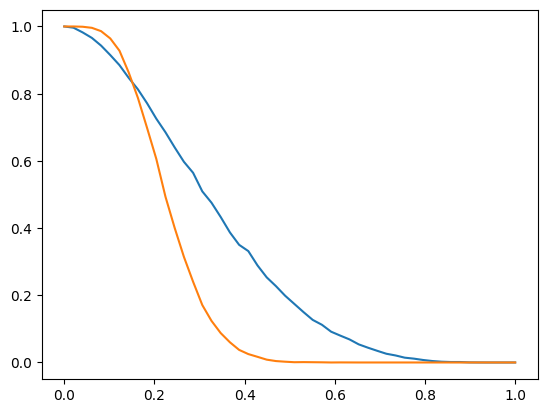

In [103]:

#Punto 2
##Inciso a)
x=np.linspace(0,1,50)
def prob_binomial(N,w,a,x):
    h=0
    prob=np.array([])
    
    for i in range(N):
        muestra=np.random.binomial(n=w,p=x[i],size=10000) 
        
        for j in range(10000):
            if muestra[j]<=a:
                h+=1
        prob=np.append(prob,(h/10000))
        h=0
    return prob

aceptacion_5=prob_binomial(50,5,1,x) 
aceptacion_25=prob_binomial(50,25,5,x)
plt.plot(x,aceptacion_5)
plt.plot(x,aceptacion_25)
plt.show
#Notemos que para p entre 0 y 0.3, la curva naranja está por encima, de modo que al comprador le sirve más el segundo plan
#Por otro lado, para el otro caso, la curva azul está por encima, de modo que al vendedor le sirve más el primer plan

##Inciso b)
####a)
def menor_n(N):
    menor = N + 1  
    for i in range(N + 1):
        proba_m = (np.exp(-1) * (1 ** i)) / math.factorial(i)

        if proba_m <= 0.01:
            menor = i
            break  

        

    return menor
menor_n=menor_n(50)
menor_n
###b)
def menor_h(N):
    menor = N + 1
    for h in range(N + 1):
        # Como queremos cero desconexiones, en la expresión de Poisson tendríamos x=0.
        # Y como lo queremos en h horas, entonces tomamos lambda=1/4 y lo multiplicamos por h.
        prob_cero_h = np.exp(-(h/4))
        if prob_cero_h <= 0.02:
            menor = h
            break 
    return menor
menor_cantidad_horas=menor_h(20)
menor_cantidad_horas
###c) 
#Notemos que la pregunta es de distribución de probabilidad bionomial. Es como responder, \
# De tres expreimentos con probabilidad p de ser exitosos, ¿cual es la probabilidad de que al menos uno lo sea?
poisson_cero=np.exp(-1)
def binomial (n,p,x):
    comb=math.factorial(n)/(math.factorial(x)*math.factorial(n-x))
    return comb*(p**x)*(1-p)**(n-x)
probabilidad_buscada=binomial(3,poisson_cero,1)
probabilidad_buscada
###d) 
def muestreo_poisson (N):
    muestreo=np.random.poisson(lam=N/4,size=100000) 
    contador=0
    for i in muestreo:
        if i==N/4:
            contador+=1
        probabilidad=contador/100000
    return probabilidad
proba=muestreo_poisson(12) 
proba




In [104]:
#Punto 3
##Iteral 1
#Primero notemos que la integral de nuestra función desde menos infinito a hasta infinito es la misma que si fuera\
#de -1 a 2, lo cual da 1, como queremos
###Incisos a) y b)
x=sym.Symbol('x', real=True)

def funcion (x):
    return (x**2)/3

def integrar (f,x,liminf,limsup):
    return sym.integrate(f(x),(x,liminf,limsup))
a=integrar(funcion,x,0,1)
b=integrar(funcion,x,1,2)

##Iteral 2
###Inciso a)
x = sym.Symbol('x', real=True)
miu = 78
sigma = 6

def distribucion_normal(x, miu, sigma):
    return (1/(sigma*sym.sqrt(2*sym.pi))) * sym.exp(-((x-miu)**2)/(2*(sigma**2)))


integral_resultado_e = sym.integrate(distribucion_normal(x, miu, sigma), (x, 72, sym.oo))
integral_resultado=integral_resultado_e.evalf() 
integral_resultado

###Incisos b) y c)
#Asumamos que las notas van de 0 a 100

def contar_digitos_distintos_de_cero(numero):
    
    numero_str = str(numero)

   
    digitos_distintos_de_cero = [digito for digito in numero_str if digito != '0']


    cantidad = len(set(digitos_distintos_de_cero))

    return cantidad

def probabilidad_superior(y):
    return sym.integrate(distribucion_normal(x,miu,sigma), (x, y, sym.oo))

def hallar_limite(ptaje):
    n=contar_digitos_distintos_de_cero(ptaje)
    x_valores = np.linspace(78, 100, 1000)
    limite_calificacion = 100  

    for i in x_valores:
        prob = probabilidad_superior(i).evalf()
        print(prob)
        if round(prob, n) <= ptaje:
            limite_calificacion = i
            break  

    return limite_calificacion

buscado_b =hallar_limite(0.1)
buscado_c=hallar_limite(0.231)
(buscado_b,buscado_c) 


0.500000000000000
0.498535750673489
0.497071521072274
0.495607330920851
0.494143199942125
0.492679147856606
0.491215194381620
0.489751359230505
0.488287662111820
0.486824122728544
0.485360760777287
0.483897595947488
0.482434647920625
0.480971936369417
0.479509480957033
0.478047301336301
0.476585417148907
0.475123848024617
0.473662613580471
0.472201733420008
0.470741227132464
0.469281114291993
0.467821414456879
0.466362147168742
0.464903331951764
0.463444988311898
0.461987135736090
0.460529793691493
0.459072981624695
0.457616718960929
0.456161025103309
0.454705919432046
0.453251421303673
0.451797550050282
0.450344324978741
0.448891765369935
0.447439890477993
0.445988719529526
0.444538271722857
0.443088566227271
0.441639622182241
0.440191458696681
0.438744094848186
0.437297549682276
0.435851842211650
0.434406991415431
0.432963016238426
0.431519935590370
0.430077768345196
0.428636533340285
0.427196249375735
0.425756935213625
0.424318609577274
0.422881291150525
0.421444998577004
0.42000975

(85.53153153153153, 82.42642642642643)

In [146]:
#Punto 4
##Iteral 1
Transicion=np.array([[0.4,0.25,0.3,0.1],[0.2,0.25,0.3,0.1],[0.2,0.25,0.1,0.1],[0.2,0.25,0.3,0.7]])
priori=np.array([0.25,0,0.5,0.25])
gen=np.array(['T','G','C','T','C','A','A','A'])

def asignar_numeros_gen (letra):
    entrada=0
    if letra=='A':
        entrada=0
    if letra=='C':
        entrada=1
    if letra=='G':
        entrada=2
    if letra=='T':
        entrada=3
    return entrada

def markov_normal (g,T,p):
    if g[0]=='A':
        probabilidad=p[0]
    if g[0]=='C':
        probabilidad=p[1]
    if g[0]=='G':
        probabilidad=p[2]
    if g[0]=='T':
        probabilidad=p[3]
    for k in range(1,len(g)):
        j=asignar_numeros_gen(g[k])
        i=asignar_numeros_gen(g[k-1]) 
        probabilidad*=T[j][i]
    return probabilidad
hola=markov_normal(gen,Transicion,priori) 

##Iteral 2
gen_t=np.array(['A','C','G','A','G','U','U','U']) 
emision=np.array([[0.8,  0,    0,   0.2],
     [0.05, 0.9,  0.1, 0.1],
     [0.05, 0.1,  0.9, 0  ],
     [0.1,  0,    0,   0.7]])

def asignar_numeros_gen_t (letra):
    entrada=0
    if letra=='U':
        entrada=0
    if letra=='G':
        entrada=1
    if letra=='C':
        entrada=2
    if letra=='A':
        entrada=3
    return entrada
def markov_normal_t (g,g_t,E):
    probabilidad=1
    for k in range(len(g)):
        j=asignar_numeros_gen(g[k])
        i=asignar_numeros_gen_t(g_t[k]) 
        
        probabilidad*=E[i][j]
        print(probabilidad)
    return probabilidad
hola2=markov_normal_t(gen,gen_t,emision)*hola 
hola2,hola

0.7
0.63
0.5670000000000001
0.39690000000000003
0.35721
0.285768
0.22861440000000002
0.18289152000000003


(1.3716864000000004e-06, 7.500000000000001e-06)

: 